In [3]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import DailyReturns
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.factors import RSI
from quantopian.pipeline.factors import MACDSignal
from quantopian.pipeline.factors import BollingerBands
from quantopian.pipeline.factors import FastStochasticOscillator
from quantopian.pipeline.factors import IchimokuKinkoHyo
#from quantopian.pipeline.factors import 
from quantopian.pipeline.data.morningstar import Fundamentals
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.research import run_pipeline
from quantopian.pipeline.filters import Q1500US

import matplotlib.pyplot as plt
import numpy as np

from quantopian.pipeline.data.factset.estimates import PeriodicConsensus

In [4]:
universe = Q1500US()

p_e_ratio = Fundamentals.pe_ratio.latest
p_e_g_ratio = Fundamentals.peg_ratio.latest
sales_per_share = Fundamentals.sales_per_share.latest
debt_to_asset = Fundamentals.debtto_assets.latest
payout_ratio = Fundamentals.payout_ratio.latest
equity = Fundamentals.equity_investments.latest
free_cash_flow = Fundamentals.free_cash_flow.latest
book_per_share = Fundamentals.book_value_per_share.latest
cash_return = Fundamentals.cash_return.latest
ROE = Fundamentals.roe.latest
ROA = Fundamentals.roa.latest


In [5]:
def make_pipeline():
    returns = Returns(inputs=[USEquityPricing.close], window_length = 2)
    daily_returns = DailyReturns(inputs=[USEquityPricing.close],window_length=30)
    r_s_i = RSI(inputs=[USEquityPricing.close],window_length=30)
    macd = MACDSignal(inputs=[USEquityPricing.close],fast_period = 14, slow_period = 28, signal_period = 54)
    #bollinger = BollingerBands(inputs=[USEquityPricing.close],window_length=30, k = 2)
    fast_stoch = FastStochasticOscillator(inputs=[USEquityPricing.close, USEquityPricing.low, USEquityPricing.high])
    #ichi = IchimokuKinkoHyo(inputs=[USEquityPricing.high, USEquityPricing.low, USEquityPricing.close])
    
    
    
    return Pipeline(columns={
        'returns':returns,
        'daily returns':daily_returns,
        'RSI':r_s_i,
        'MACD':macd,
        #'bollinger':bollinger,
        'fast stoch':fast_stoch,
        #'ichimoku':ichi,
        'PE':p_e_ratio,
        'peg':p_e_g_ratio,
        'sales per share':sales_per_share,
        'debt to assets':debt_to_asset,
        'payout ratio':payout_ratio,
        'equity':equity,
        'free cash':free_cash_flow,
        'book per share':book_per_share,
        'cash return':cash_return,
        'ROE':ROE,
        'ROA':ROA
        
    })

results = run_pipeline(make_pipeline(),'2018-01-01','2020-01-01')

print(results.head(20))
print(results.shape)

                                                   MACD          PE       ROA  \
2018-01-02 00:00:00+00:00 Equity(2 [HWM])      0.081674   20.123451  0.005268   
                          Equity(21 [AAME])         NaN   24.285714  0.001940   
                          Equity(24 [AAPL])    1.163866   18.374593  0.029741   
                          Equity(25 [HWM_PR])       NaN         NaN  0.003265   
                          Equity(31 [ABAX])    0.212715   41.613445  0.020719   
                          Equity(41 [ARCB])    0.552980   38.031915  0.011133   
                          Equity(52 [ABM])    -0.177992   28.149254  0.013861   
                          Equity(53 [ABMD])    1.100770   91.867647  0.036385   
                          Equity(62 [ABT])     0.191263   47.558333  0.008410   
                          Equity(64 [GOLD])   -0.123563    7.779570 -0.000432   
                          Equity(66 [AB])      0.064760   11.872038  0.029956   
                          Eq

In [20]:
import qgrid  
q_grid_widget = qgrid.show_grid(results)
q_grid_widget
    

QgridWidget(grid_options={'autoEdit': False, 'syncColumnCellResize': True, 'highlightSelectedRow': True, 'bold…

In [25]:
updated_results = q_grid_widget.get_changed_df()

updated_results = updated_results.fillna(value=0)

#print(updated_results)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt


In [27]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

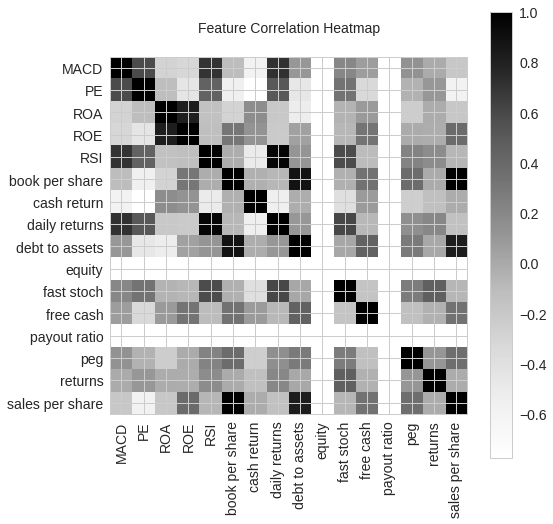

In [28]:
show_heatmap(updated_results)